In [ ]:
'''
CS6140 Assignment 4
Q3 Outlier Detection using Zscore
Jul 14 2022
Wing Man, Kwok
'''

'\nCS6140 Assignment 4\nQ3 Outlier Detection using Zscore\nJul 14 2022\nWing Man, Kwok\n'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import sort
from scipy.stats import t, chi2         # To compute T score

In [ ]:
def detect_outliners(x_variable, threshold):
  sd = np.abs((x_variable - np.mean(x_variable))/np.std(x_variable))
  return np.where(sd > threshold)

In [ ]:
def print_outliners(outliner_row_index1,outliner_row_index2, threshold):
  outliners_index = np.append(outliner_row_index1,outliner_row_index2)
  outliners_index = np.unique(outliners_index)
  outliners_index.sort(kind='mergesort')
  num_outliners = outliners_index.size

  print("Results - Number of outliners found:", num_outliners, ", threshold", threshold, "\n")
  print(df.iloc[outliners_index].head(5).to_string(index = False), "\n")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


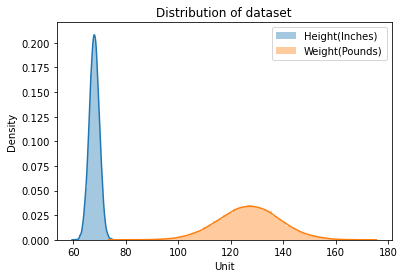

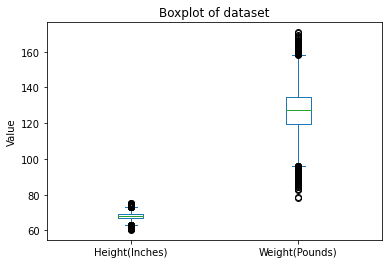


EDA by df.describe(): 

              Index  Height(Inches)  Weight(Pounds)
count  25000.000000    25000.000000    25000.000000
mean   12500.500000       67.993114      127.079421
std     7217.022701        1.901679       11.660898
min        1.000000       60.278360       78.014760
25%     6250.750000       66.704397      119.308675
50%    12500.500000       67.995700      127.157750
75%    18750.250000       69.272958      134.892850
max    25000.000000       75.152800      170.924000


In [ ]:
#EDA for dataset visualization - distribution
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS6140 Assignment4/HeightWeight.csv")

sns.distplot(df["Height(Inches)"], label = "Height(Inches)")
sns.distplot(df["Weight(Pounds)"], label = "Weight(Pounds)")
plt.xlabel("Unit")
plt.legend()
plt.title("Distribution of dataset")
plt.show()

#EDA by boxplot
df[["Height(Inches)", "Weight(Pounds)"]].plot(kind = "box")
plt.ylabel("Value")
plt.title("Boxplot of dataset")
plt.show()

#EDA by df.describe()
print("\nEDA by df.describe():", "\n")
print(df.describe())

In [ ]:
#Detect outliners, threshold = 1
outliner_row_index1 = detect_outliners(df["Height(Inches)"], threshold = 1)
outliner_row_index2 = detect_outliners(df["Weight(Pounds)"], threshold = 1)

#Print result
print_outliners(outliner_row_index1, outliner_row_index2, threshold = 1)

#Detect outliners, threshold = 3
outliner_row_index1 = detect_outliners(df["Height(Inches)"], threshold = 3)
outliner_row_index2 = detect_outliners(df["Weight(Pounds)"], threshold = 3)

#Print result
print_outliners(outliner_row_index1, outliner_row_index2, threshold = 3)

Results - Number of outliners found: 12495 , threshold 1 

 Index  Height(Inches)  Weight(Pounds)
     1        65.78331        112.9925
     2        71.51521        136.4873
     3        69.39874        153.0269
     4        68.21660        142.3354
     5        67.78781        144.2971 

Results - Number of outliners found: 114 , threshold 3 

 Index  Height(Inches)  Weight(Pounds)
   139        73.90107        151.3913
   175        73.83364        139.2983
   250        65.93895         84.3598
   368        72.32489        168.2290
   413        62.01666        109.0848 



Despite the question asks to detect outliners by threshold 1, it is easy to prone to outliners for multivariables dataset, therefore I have also put the result of threshold 3, for better description of outliners.